In [16]:
#!pip3 install torch torchvision torchaudio

In [17]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.2805, 0.6315, 0.2363],
        [0.5017, 0.7830, 0.6355],
        [0.0745, 0.6797, 0.9147],
        [0.3125, 0.6815, 0.2801],
        [0.4119, 0.3291, 0.3626]])


In [18]:
torch.cuda.is_available()

True

Awesome

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

cinic_directory = '../data'
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]
cinic_train = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(cinic_directory + '/train',
    	transform=transforms.Compose([transforms.ToTensor(),
        transforms.Normalize(mean=cinic_mean,std=cinic_std)])),
    batch_size=128, shuffle=True)

In [21]:
cinic_train = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(cinic_directory + '/train',
    	transform=transforms.ToTensor()),
    batch_size=128, shuffle=True)

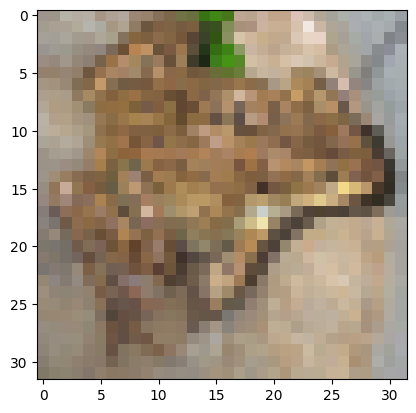

Label for image 1: frog


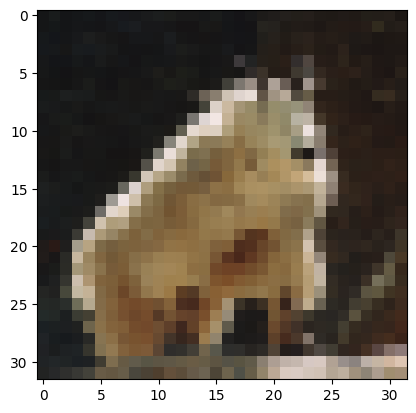

Label for image 2: deer


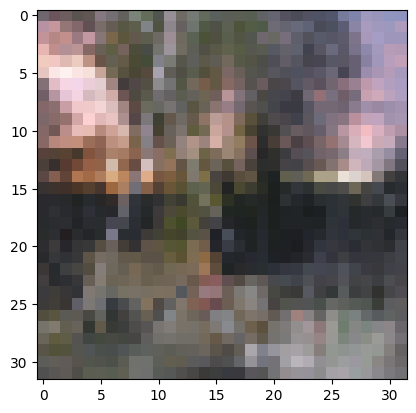

Label for image 3: cat


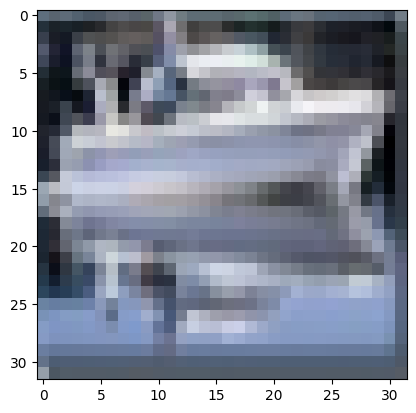

Label for image 4: ship


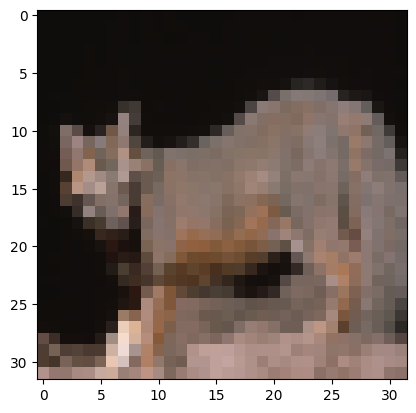

Label for image 5: dog


In [22]:
import matplotlib.pyplot as plt

images, labels = next(iter(cinic_train))

class_names = list(cinic_train.dataset.classes)

first_5_images = images[:5]
first_5_labels = labels[:5]  # Get the labels for the first 5 images

# To visualize the images (assuming you're using matplotlib)
for i in range(5):
    # Display the image
    plt.imshow(first_5_images[i].permute(1, 2, 0))  # Convert from CHW to HWC for plotting
    plt.show()
    
    label_name = class_names[first_5_labels[i].item()]
    print(f"Label for image {i+1}: {label_name}")

In [23]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [25]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(cinic_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.230
[1,   400] loss: 0.230
[1,   600] loss: 0.230
[2,   200] loss: 0.230
[2,   400] loss: 0.229
[2,   600] loss: 0.228
Finished Training


In [28]:
# Assuming 'device' is either 'cuda' or 'cpu' (use torch.device())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Make sure your model is on the correct device
net = net.to(device)
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(cinic_train, 0):
        # Get the inputs and labels
        inputs, labels = data

        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # Print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 1.990
[1,   400] loss: 1.976
[1,   600] loss: 1.949
[2,   200] loss: 1.930
[2,   400] loss: 1.910
[2,   600] loss: 1.902
Finished Training


Its faster but not significantly faster I guess its because of low complexity